In [2]:
import pandas as pd
from pathlib import Path
import sys

project_root = Path.cwd().resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src.data_cleaning import (
    clean_team_season_standard,
    clean_team_match_standard,
    clean_schedule,
)
from src.plotting import (
    plot_points_over_time,
    plot_goals_for_against,
    plot_xg_vs_points,
)

In [4]:
# 1. Load / clean data
team_season_clean = clean_team_season_standard()
team_match_clean = clean_team_match_standard(team_season_clean)
schedule_clean = clean_schedule()


Saved cleaned team season stats to ../data/fbref/processed/team_season_clean.csv
Saved cleaned team match stats to ../data/fbref/processed/team_match_clean.csv
Saved cleaned schedule to ../data/fbref/processed/schedule_clean.csv


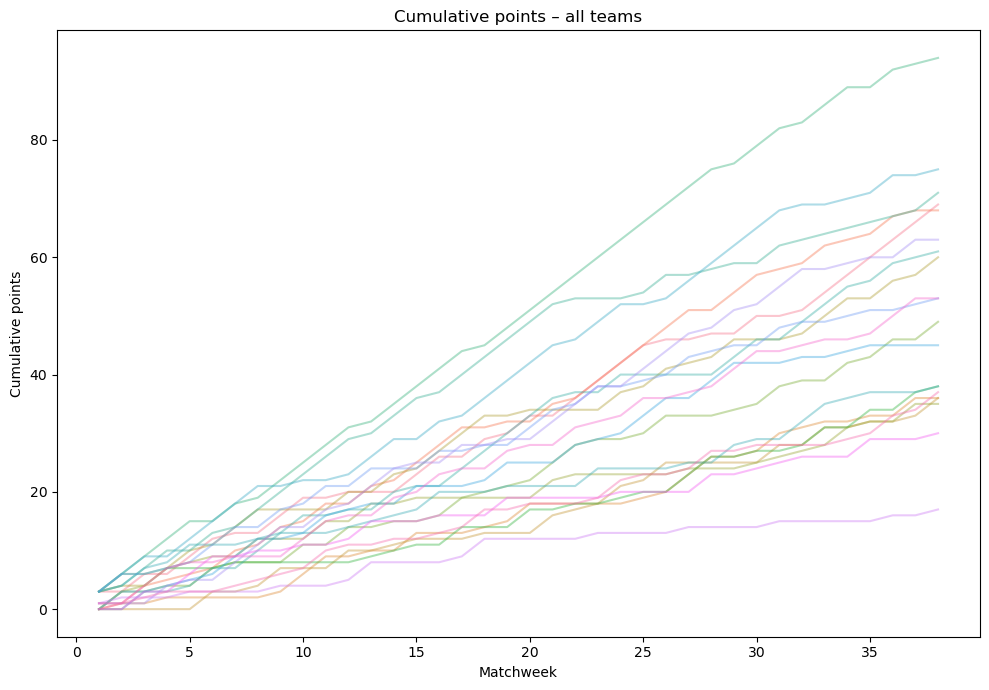

In [6]:
plot_points_over_time(team_match_clean)

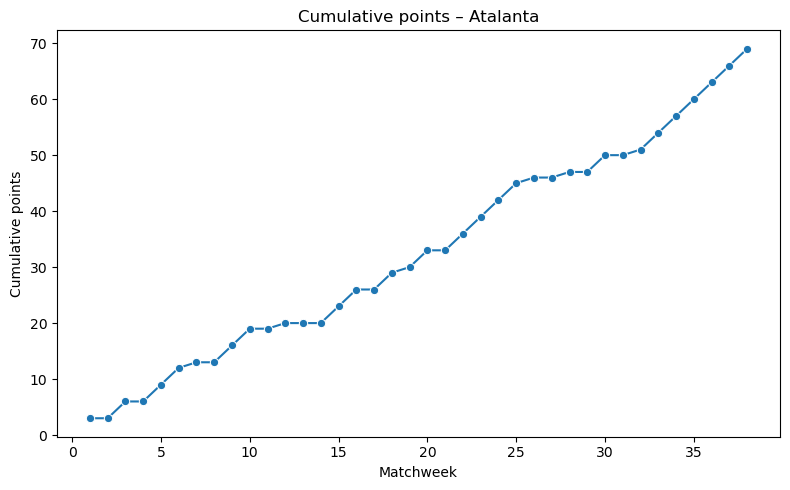

In [8]:
plot_points_over_time(team_match_clean, team="Atalanta")

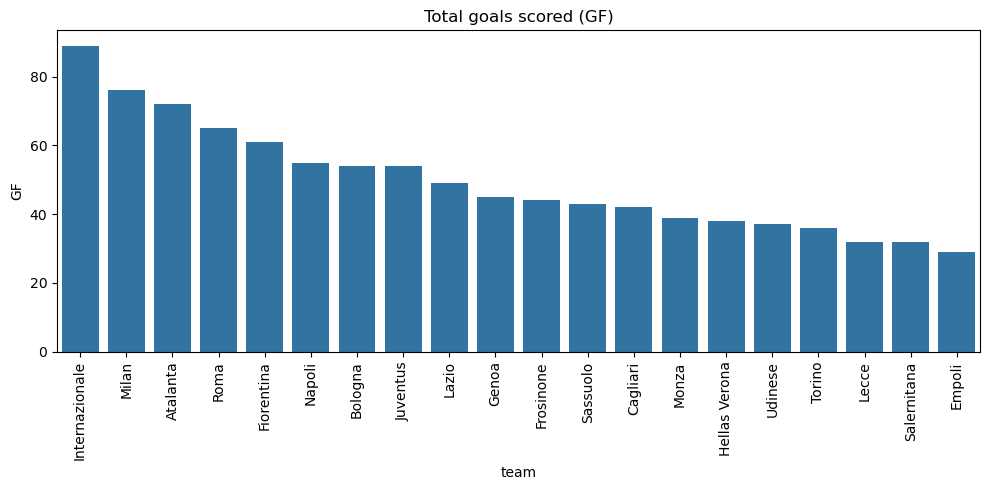

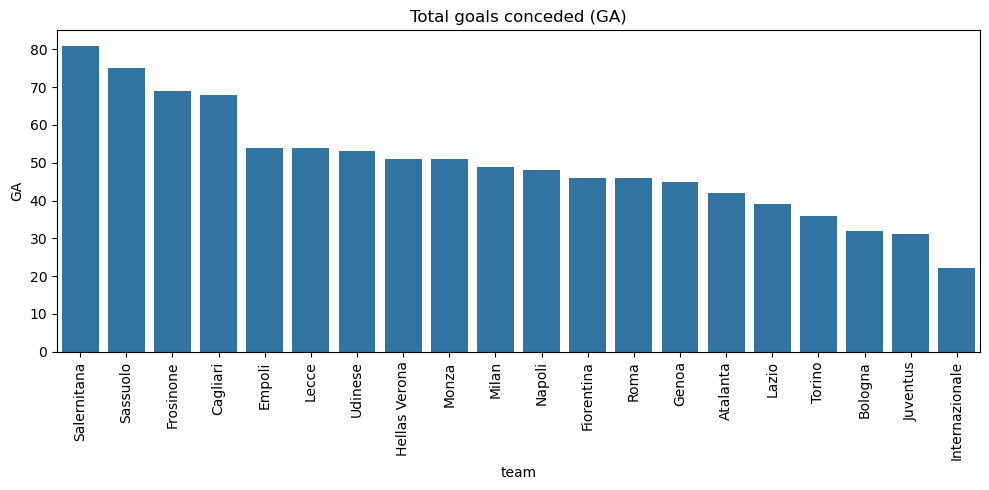

In [10]:
plot_goals_for_against(team_match_clean) 

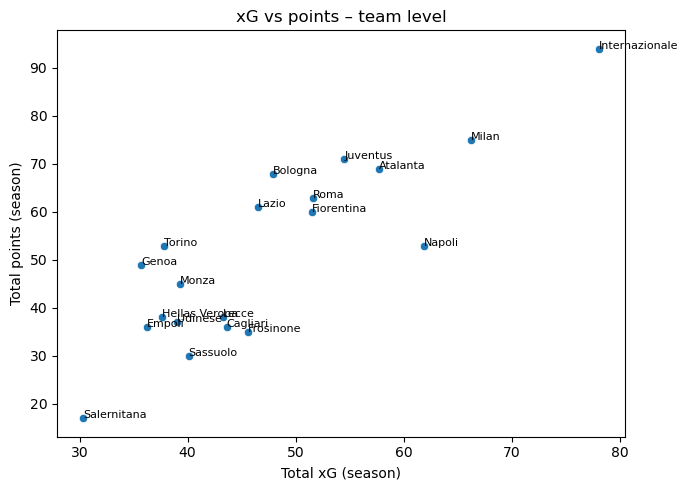

In [14]:
plot_xg_vs_points(team_match_clean)

In [18]:
team_season_clean.head()

,players_used,Age,Poss,Playing Time,Playing Time.1,Playing Time.2,Playing Time.3,Performance,Performance.1,Performance.2,...,Per 90 Minutes.2,Per 90 Minutes.3,Per 90 Minutes.4,Per 90 Minutes.5,Per 90 Minutes.6,Per 90 Minutes.7,Per 90 Minutes.8,Per 90 Minutes.9,url,team
0,29.0,26.3,51.0,38,418,3420,38,72,57,129,...,3.39,1.76,3.26,1.52,1.16,2.68,1.42,2.57,/en/squads/922493f3/2023-2024/Atalanta-Stats,Atalanta
1,28.0,25.2,58.1,38,418,3420,38,52,32,84,...,2.21,1.26,2.11,1.26,0.84,2.11,1.16,2.0,/en/squads/1d8099f8/2023-2024/Bologna-Stats,Bologna
2,29.0,26.1,42.1,38,418,3420,38,41,30,71,...,1.87,0.97,1.76,1.13,0.77,1.9,1.01,1.78,/en/squads/c4260e09/2023-2024/Cagliari-Stats,Cagliari
3,34.0,26.0,44.0,38,418,3420,38,26,19,45,...,1.18,0.55,1.05,0.95,0.68,1.63,0.85,1.53,/en/squads/a3d88bd8/2023-2024/Empoli-Stats,Empoli
4,30.0,27.0,57.4,38,418,3420,38,60,41,101,...,2.66,1.47,2.55,1.36,0.93,2.29,1.19,2.12,/en/squads/421387cf/2023-2024/Fiorentina-Stats,Fiorentina


In [20]:
team_match_clean.head()

,date,time,round,day,venue,result,GF,GA,opponent,xG,...,Attendance,Captain,Formation,Opp Formation,Referee,match_report,Notes,team,matchweek,points
0,2023-08-20,18:30:00,Matchweek 1,Sun,Away,W,2,0,Sassuolo,1.3,...,12298.0,Marten de Roon,3-5-2,4-2-3-1,Matteo Marchetti,/en/matches/32dc37db/Sassuolo-Atalanta-August-...,NaN,Atalanta,1,3
1,2023-08-26,18:30:00,Matchweek 2,Sat,Away,L,1,2,Frosinone,1.6,...,13426.0,Marten de Roon,3-4-1-2,4-2-3-1,Juan Sacchi,/en/matches/0b355cdd/Frosinone-Atalanta-August...,NaN,Atalanta,2,0
2,2023-09-02,20:45:00,Matchweek 3,Sat,Home,W,3,0,Monza,1.3,...,14985.0,Marten de Roon,3-4-1-2,3-4-3,Matteo Marcenaro,/en/matches/6e72c38b/Atalanta-Monza-September-...,NaN,Atalanta,3,3
3,2023-09-17,18:00:00,Matchweek 4,Sun,Away,L,2,3,Fiorentina,0.7,...,32100.0,Rafael Tolói,3-4-1-2,4-2-3-1,Luca Pairetto,/en/matches/2a18afe9/Fiorentina-Atalanta-Septe...,NaN,Atalanta,4,0
4,2023-09-24,15:00:00,Matchweek 5,Sun,Home,W,2,0,Cagliari,1.7,...,14739.0,Marten de Roon,3-4-3,3-5-2,Ermanno Feliciani,/en/matches/915c6bb6/Atalanta-Cagliari-Septemb...,NaN,Atalanta,5,3


In [24]:
schedule_clean.head()

,week,day,date,time,home_team,home_xg,score,away_xg,away_team,attendance,venue,referee,match_report,notes,game_id,home_goals,away_goals
0,1,Sat,2023-08-19,18:30,Empoli,0.7,0–1,0.5,Hellas Verona,7940.0,Stadio Carlo Castellani,Luca Massimi,/en/matches/b787871d/Empoli-Hellas-Verona-Augu...,NaN,b787871d,0.0,1.0
1,1,Sat,2023-08-19,18:30,Frosinone,0.9,1–3,1.5,Napoli,15822.0,Stadio Benito Stirpe,Matteo Marcenaro,/en/matches/305afcf5/Frosinone-Napoli-August-1...,NaN,305afcf5,1.0,3.0
2,1,Sat,2023-08-19,20:45,Genoa,0.2,1–4,1.0,Fiorentina,33045.0,Stadio Comunale Luigi Ferraris,Giovanni Ayroldi,/en/matches/8260e428/Genoa-Fiorentina-August-1...,NaN,8260e428,1.0,4.0
3,1,Sat,2023-08-19,20:45,Inter,2.7,2–0,0.8,Monza,72509.0,Stadio Giuseppe Meazza,Andrea Colombo,/en/matches/254420f7/Internazionale-Monza-Augu...,NaN,254420f7,2.0,0.0
4,1,Sun,2023-08-20,20:45,Lecce,1.4,2–1,1.6,Lazio,29081.0,Stadio Comunale Via Del Mare,Federico Dionisi,/en/matches/3e38d727/Lecce-Lazio-August-20-202...,NaN,3e38d727,2.0,1.0
